#### logistic 합격 불합격을 판단
```
공부한 시간 데이터를 보고 합격여부를 예측
공부시간에 비례해서 점수를 부여
공부 1시간에 10점 부여
--> 선형 방정식  :  z(합격점수) = w(가중치)* 공부시간 + b(편향)
w(가중치) : 중요도 1시간당 점수 ( 10점 )
b(편향) : 기본점수 ( -50 , 5시간은 공부해야 0점 )

문제점 : 합격점수에 해당하는 100점이 나올수도 있지만 -200점이 나올수도 있음..
분류를 하려면 즉, 합격 불합격판단... 우리가 원하는 것은 방정식의 값으로 확률을 계산하고 싶음. (확률은 0 ~ 100)
```

#### 점수를 확률로 바꿔야한다(시그모이드 함수를 이용)
```
0 ~ 1 사이의 확률값으로 변경해줌
합격확률 - 시그모이드(z) = 1 / 1 + e^ - z
1 : 합격점수 높음
0 : 합격점수 낮음
합격점수가 0이면 정확히 0.5(50%) - 임계값(임계치)
```

#### 비용함수 : 모델이 얼마나 틀렸는지 측정  /  로지스틱은 로그함수를 사용
```
합격을 예측했다 (정답=1)
모델이 99%로 합격 예측했다? -> 벌점은 거의 0점
모델이 1%로 합격 예측했다? -> 벌점은 무한대로 크게

불합격을 예측했다 (정답=0)
모델이 1%로 합격 예측했다? -> 벌점은 거의 0점
모델이 99%로 합격 예측했다? -> 벌점은 무한대로 크게

log loss 원리
w,b 를 찾음.. 손실함수를 이용해서 비용이 가장 낮을때

```

#### 비용이 최저인 값을 찾아나가는 과정 : 경사하강법

#### 학습에 대해 너무 완벽한 모델
```
규제(Regularization) 모델이 너무 복잡해 지지않도록 패널티 또는 단순함에 대한 보너스
L2규제(Ridge) : w(중요도) 값이 너무 커지는 것을 막는다. 가중치(w) 제곱의 합을 벌점으로 추가
L1규제(Lasso) : 어떤 특징이 별로 안 중요할거 같은 특징이 있음 그냥 w(중요도)를 그냥 0으로 만든다. / 불필요한 특성을 제거하는 효과 / 가중치들(w)의 절대값의 합을 패널티로 추가
- feature selector 역할도 함
```


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

x_train, x_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , stratify=y)

clr = LogisticRegression(max_iter=10000)
clr.fit(x_train , y_train)
predict = clr.predict(x_test)
print(predict[:5] , y_test[:5])
predict_proba = clr.predict_proba(x_test)
predict_proba[:5]



[1 1 1 1 0] [1 1 1 1 0]


array([[3.46356522e-01, 6.53643478e-01],
       [1.24501128e-02, 9.87549887e-01],
       [6.54332975e-03, 9.93456670e-01],
       [4.63391140e-01, 5.36608860e-01],
       [9.99894002e-01, 1.05998413e-04]])

In [2]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# --- 시각화 함수 (공통) ---
def plot_decision_boundary(model, X_orig, y_orig, poly_transformer, scaler_transformer, title, subplot_ax):
    """모델의 결정 경계를 그려주는 함수"""
    # 1. 그래프를 그릴 영역을 정의합니다.
    x_min, x_max = X_orig[:, 0].min() - 0.5, X_orig[:, 0].max() + 0.5
    y_min, y_max = X_orig[:, 1].min() - 0.5, X_orig[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 2. 그래프 영역의 모든 점들을 모델이 예측할 수 있도록 변환합니다.
    grid_poly = poly_transformer.transform(np.c_[xx.ravel(), yy.ravel()])
    grid_scaled = scaler_transformer.transform(grid_poly)

    # 3. 변환된 점들을 모델로 예측합니다.
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    # 4. 결정 경계와 원본 데이터 포인트를 그립니다.
    subplot_ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    subplot_ax.scatter(X_orig[:, 0], X_orig[:, 1], c=y_orig, cmap=plt.cm.coolwarm, edgecolors='k')
    subplot_ax.set_title(title)
    subplot_ax.set_xlabel("Feature 1")
    subplot_ax.set_ylabel("Feature 2")

In [3]:
# 과적합을 임의로 만들어서 시각화
# 1. 규제 알고리즘을 적용
# 2. 모델을 경량화.. 모델의 복잡도를 높이는 요소를 제거
# 3. 추가 데이터를 투입해서 학습


In [8]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def plot_decision_boundary(model, X, y, poly, scaler, title, ax):
    # 과적합이 심해도 데이터를 추가하면 완만해지는 효과가 있음.
    fig , axes = plt.subplots(1,3,figsize=(20,6))
    # 과적합 모델
    X_small , y_small = make_moons(n_samples=50 , noise=0.25 , random_state=45)


    # 고차항 특성으로 변환을 할껀데 과적합을 유도할꺼임
    poly = PolynomialFeatures(degree=10 , include_bias=False)
    X_poly_small = poly.fit_transform(X_small)

    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled_small = scaler.fit_transform(X_poly_small)

    # 모델훈련
    log_reg_overfit = LogisticRegression(C=1000,max_iter=10000) # C가 규제강도. 클수록 규제를 약하게  max_iter는 학습횟수
    log_reg_overfit.fit(X_scaled_small , y_small)
    plot_decision_boundary(log_reg_overfit , X_small , y_small , poly , scaler , 'overfitting model data=50',axes[0])# 학습에 너무 치중한 결과

    # 규제 적용 (데이터 50개 , 강한 규제 적용해보자) - 과적합 예상됨
    log_reg_regulation = LogisticRegression(C=0.1,max_iter=10000)
    log_reg_regulation.fit(X_scaled_small , y_small)
    plot_decision_boundary(log_reg_regulation , X_small , y_small , poly , scaler , 'C=0.1 max_iter=1000 data=50',axes[1])

# -----------------------------------------------------------------------------------------------------------------------------

    # 데이터를 추가 ( 데이터 500추가 , 약하게)
    X_large , y_large = make_moons(n_samples=500 , noise=0.25 , random_state=45) # noise는 값을 일부러 흐트러뜨림 (숫자가 높을수록 과적합up)

    # 고차항 특성으로 변환을 할껀데 과적합을 유도할꺼임
    poly = PolynomialFeatures(degree=10 , include_bias=False)
    X_poly_large = poly.fit_transform(X_large)

    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled_large = scaler.fit_transform(X_poly_large)

    # 모델훈련(데이터 500개 , 약한 규제)
    log_reg_moredata = LogisticRegression(C=1000,max_iter=10000,random_state=45) # C가 규제강도. 클수록 규제를 약하게  max_iter는 학습횟수
    log_reg_moredata.fit(X_scaled_large , y_large)
    plot_decision_boundary(log_reg_moredata , X_large , y_large , poly , scaler , 'C=1000 max_iter=1000 data=500',axes[2])


#### ROC , AUC
```
정확도 99% but, 데이터가 불균형이라면 좋은 척도가 못된다..
ROC AUC 가 얼마나 안정적으로 ㅈ호은 성능을 내는지를 종합적으로 시각화
모델이 예측한 확률을 기반으로 분류기준점(The=reshold)을 계속 변경해서 모델의 성능이 어떻게 변하는지 하나의 곡선으로 알 수 있다.
```

#### ROC 구성요소 TPR FPR
```
* 암을 예시로 들어보면,

혼동행렬 (P : 1 , N : 0) P : 암환자, N : 정상
TP(True Positive) : 진짜 암환자라고 예측 (정답) *중요
FN(False Negative) : 진짜 암환자를 정상으로 예측 (오답) / 놓친 암환자 *중요
FP(False Positive) : 정상인 사람을 암환자라고 예측 (오답)
TN(True Negative) : 정상인 사람을 정상이라고 예측 (정답)
    뒤에 있는게 예측한거고 앞에 있는게 맞다 틀리다로 보면 됨 
ROC 곡선의 x와 y축
y축 : 진짜를 얼마나 잘 찾았냐  TPR(True Positive Rate) 실제 양성인 데이터 중 모델이 양성으로 올바르게 예측한 비율
실제 암환자인데 암환자라고 예측 / 실제 모든 암 환자 수 = TP / TP + FN = TPR

x축 : 가짜를 얼마나 잘못 찾았냐  FPR(False Positive Rate) 실제 음성인 데이터 중 모델이 양성으로 잘못 예측한 비율
정상인데 암이라고 예측 / 실제 모든 정상인 수 = FP / FP + TN = FPR
```

#### AUC (Area Under The Curve)
```
ROC 곡선 아래의 면적
1 : 완벽한 모델 ROC가 좌측상단에 붙어 있는 모양
0.5 : 무작위로 찍는것과 같은 즉, 랜덤하게 예측하는 수준 ROC 대각선 직선
< 0.5 : 예측을 반대로 즉, 잘못된 모델

```

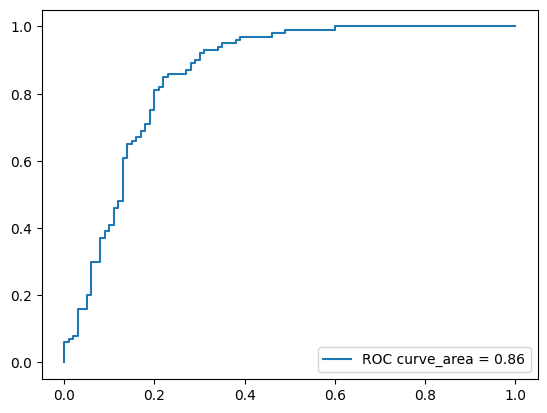

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.80      0.81      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [9]:
# 임의로 만드는것 ( 존재X)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve , auc , classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


X,y = make_classification(n_samples=1000 , n_features=20 , n_informative=5 , n_redundant=0 , random_state=42)

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42 , stratify=y)

model = LogisticRegression()
model.fit(X_train , y_train)

# 그래프를 그릴때 확률이 필요함
y_pred_proba = model.predict_proba(X_test)[:,1] # 양성값만 나타냄

# ROC AUC
# 실제값과 예측 확률을 사용 FPR TPR
# 순서가 중요함
fpr , tpr , thresholds = roc_curve(y_test , y_pred_proba)

# FPR TPR 이용 AUC를 계산
roc_auc = auc(fpr , tpr)

plt.plot(fpr , tpr , label=f'ROC curve_area = {roc_auc:.2f}')
plt.legend()
plt.show()

# 모델만 머신러닝이지 평가나 시각화는 딥러닝도 비슷함
print(classification_report( y_test, model.predict(X_test)) )
